# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

from utils.plot import cov, compare_vars, plot_varchanges
from utils.plot import compare_KLs, plot_KLs
#import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE_C, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

from utils.simulation_wrapper import event_seed, set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(25, small_steps=True)


In [10]:
window_len = 30
prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 17.3,    # prox1 weights
            0, 0, 0, 0, 0, 0, 51.980,            # distal weights
            0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights



prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
            0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08, 
            0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977, 
                0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08, 
                0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])

prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [6]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [8]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = '10000_sims_25_fake_obs_3steps'

os.chdir('..')
print(os.getcwd())

os.chdir('results')

print(os.getcwd())
  

thetas = torch.load('{}/thetas.pt'.format(file))

#posterior = torch.load('{}/posterior.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu/sbi_for_eeg_data
/home/ubuntu
/home/ubuntu/results


## Inference step:

In [11]:
density_estimator = 'nsf'



#inf = SNPE(prior=prior, density_estimator = density_estimator)

inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas, x)

density_estimator = inf.train()

posterior = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

Neural network successfully converged after 58 epochs.


## Simulation under 'true parameters'

In [12]:
obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)
#obs_real = torch.load('{}/obs_real.pt'.format(file))

FileNotFoundError: [Errno 2] No such file or directory: '10000_sims_25_fake_obs_3steps/obs_real.pt'

In [35]:
obs_real_stat = calculate_summary_stats_temporal(obs_real)

samples = posterior.sample((100000,), x=obs_real_stat)

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

In [36]:
parameter_names = ["prox1_ampa_l2_bas","prox1_nmda_l2_bas","prox1_ampa_l2_pyr", "prox1_nmda_l2_pyr", "prox1_ampa_l5_bas", "prox1_nmda_l5_bas", "prox1_ampa_l5_pyr", "prox1_nmda_l5_pyr",
"t_prox1",
"dist_ampa_l2_bas", "dist_nmda_l2_bas", "dist_ampa_l2_pyr", "dist_nmda_l2_pyr", "dist_ampa_l5_pyr","dist_nmda_l5_pyr",
"t_dist", 
"prox2_ampa_l2_bas","prox2_nmda_l2_bas","prox2_ampa_l2_pyr", "prox2_nmda_l2_pyr", "prox2_ampa_l5_bas", "prox2_nmda_l5_bas", "prox2_ampa_l5_pyr", "prox2_nmda_l5_pyr",
"t_prox2"]

In [37]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.1

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([3.1687e-06, 9.4754e-05, 2.3859e-05, 7.3288e-08, 6.9720e-06, 2.0351e-04,
        9.7344e-07, 9.2908e-07, 1.7321e+01, 1.9599e-06, 6.2342e-05, 2.0649e-08,
        9.2298e-06, 1.1937e-05, 7.1737e-04, 5.2133e+01, 5.5866e-10, 5.8749e-03,
        7.8040e-03, 4.8425e-05, 2.5922e-06, 1.4118e-03, 2.2805e-02, 1.5501e-06,
        1.1213e+02])
tensor([9.2499e-01, 1.0000e+00, 1.5995e-01, 1.8636e-01, 2.0928e+00, 9.9342e-01,
        5.1897e-02, 1.0389e-01, 3.0132e+01, 3.9398e-02, 1.1699e-01, 4.1998e-05,
        2.5901e-02, 8.5371e-01, 3.8664e-01, 6.7251e+01, 1.7936e-05, 1.0000e+00,
        8.6328e+00, 9.9959e-01, 5.3708e-02, 1.0000e+00, 4.1016e+00, 2.9597e-01,
        1.2760e+02])
tensor([9.2498e-02, 9.9990e-02, 1.5993e-02, 1.8636e-02, 2.0928e-01, 9.9322e-02,
        5.1896e-03, 1.0389e-02, 1.2810e+00, 3.9396e-03, 1.1693e-02, 4.1977e-06,
        2.5891e-03, 8.5370e-02, 3.8593e-02, 1.5118e+00, 1.7936e-06, 9.9412e-02,
        8.6250e-01, 9.9955e-02, 5.3705e-03, 9.9858e-02, 4.0788e-01, 2.9597e-02

<Figure size 432x288 with 0 Axes>

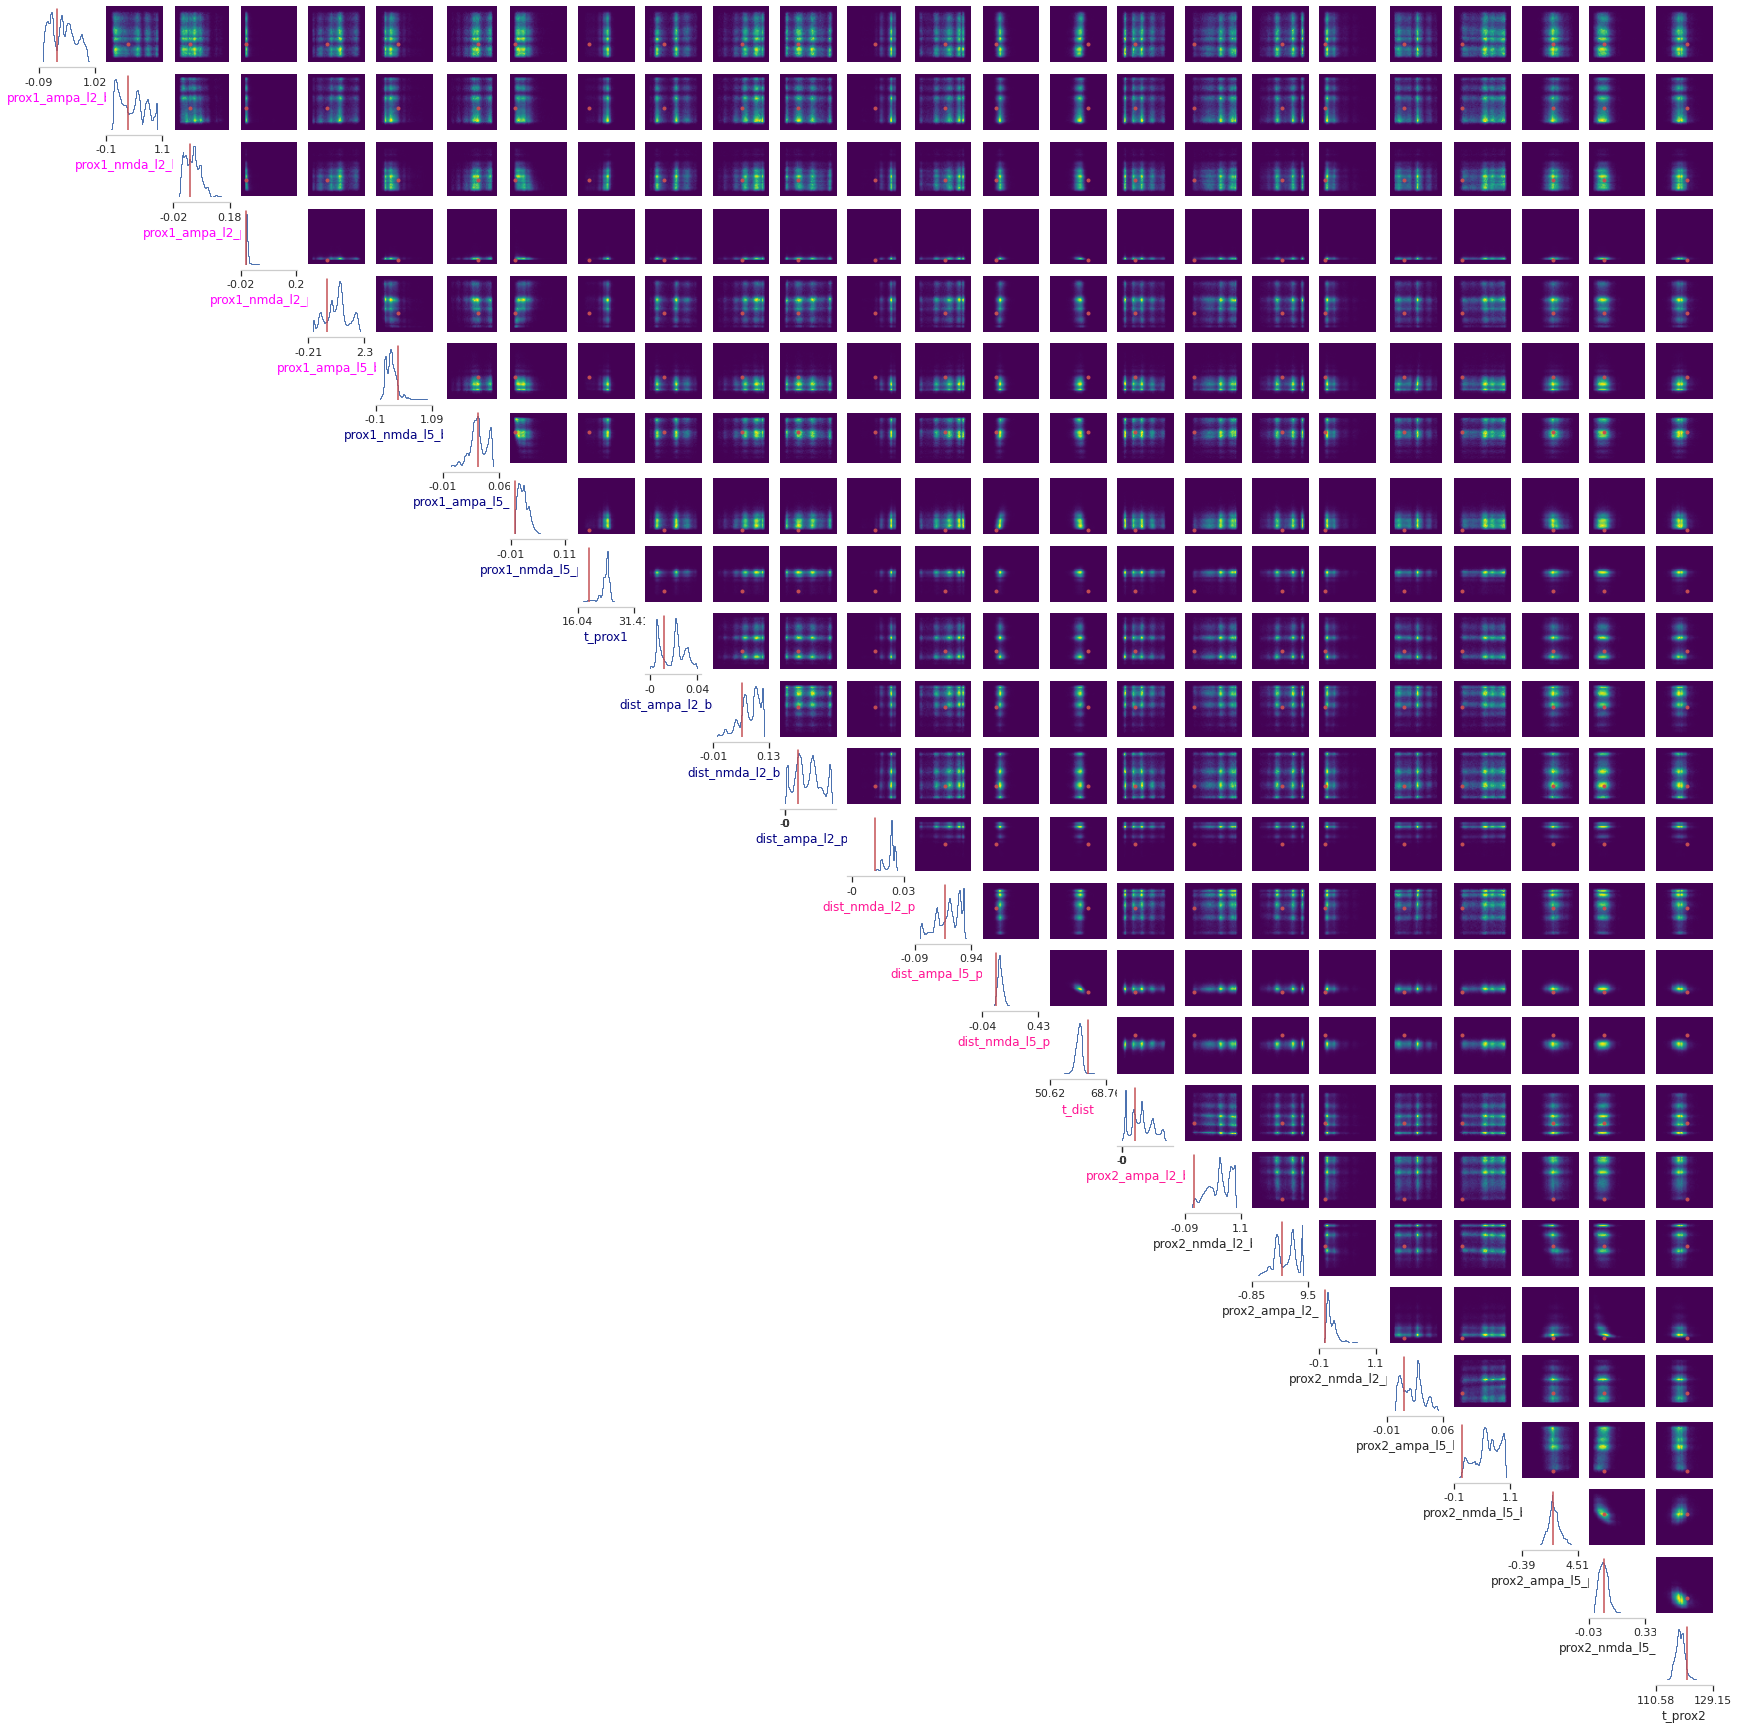

In [38]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    ticks=np.round(limits,2),
    figsize=(30, 30),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
)

for i in range(5):
    axes[i][i].xaxis.label.set_color('magenta')
for i in range(5, 12):
    axes[i][i].xaxis.label.set_color('navy')
for i in range(12, 17):
    axes[i][i].xaxis.label.set_color('deeppink')

In [39]:
posterior.set_default_x(obs_real_stat)
condition = posterior.sample((1,))

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

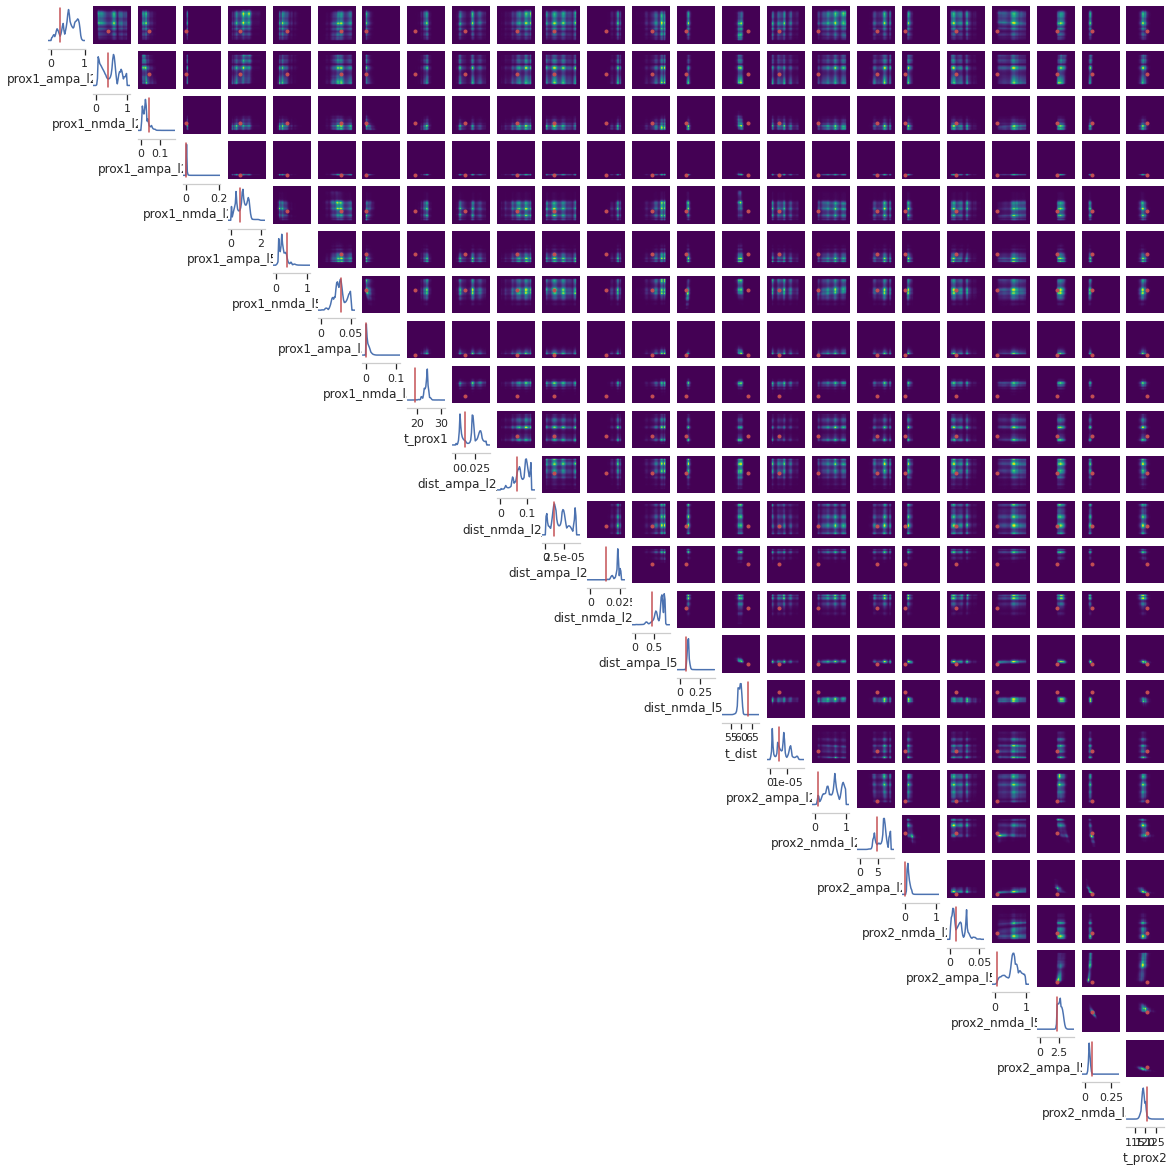

In [40]:
_ = analysis.conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 6},
    points_colors="r",
    labels=parameter_names,
    #color_map = ['Blues', 'Reds'],
    #alpha1 = 0.8,
    #alpha2 = 0.4
 
)


In [41]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  25
[0.545508086681366, 0.051524724811315536, 0.05184430629014969, 0.0004170222964603454, 0.5134934782981873, 0.09560086578130722, 0.04637109115719795, 0.03166821599006653, 23.009632110595703, 0.009454911574721336, 0.09646271169185638, 1.0708201443776488e-05, 0.025579610839486122, 0.7397136092185974, 0.13423743844032288, 60.73662185668945, 1.0618573469400872e-06, 0.3760775327682495, 8.302020072937012, 0.22907410562038422, 0.03339976444840431, 0.6732468605041504, 2.5627777576446533, 0.022556178271770477, 119.83979797363281]early stop 
200.0
param size  early stop 25200.0
param size  25
[0.4598761796951294, 0.7674183249473572, 0.07236134260892868, 0.004025667905807495, 1.236623764038086, 0.14985114336013794, 0.0505780354142189, 0.004263940267264843, 23.631025314331055, 0.006002718582749367, 0.1030566394329071, 3.0856739613227546e-05, 0.025200843811035156, 0.546559751033783, 0.14169174432754517, 60.00017166137695, 1.0797856475619483e-06, 0.9636079668998718, 2.9

 [0.16130924224853516, 0.778294026851654, 0.04389215260744095, 0.0007395956781692803, 0.38948050141334534, 0.5115239024162292, 0.04233182221651077, 0.014497081749141216, 24.058652877807617, 0.023899558931589127, 0.10024620592594147, 2.100092387991026e-06, 0.023179039359092712, 0.7041500806808472, 0.10819969326257706, 61.02664566040039, 1.4692705008201301e-05, 0.7150615453720093, 3.9512698650360107, 0.04213646054267883, 0.028871092945337296, 0.12475669384002686, 3.2245967388153076, 0.04758838936686516, 117.9563980102539]joblib will run over 1 jobs[0.7399989366531372, 0.16266310214996338, 0.06736801564693451, 0.0008293123682960868, 1.9176963567733765, 0.08961651474237442, 0.04053105413913727, 0.024349572136998177, 24.843677520751953, 0.003981480840593576, 0.103993259370327, 3.145985465380363e-05, 0.017656175419688225, 0.8186942338943481, 0.10674358904361725, 60.69845199584961, 1.2236899237905163e-05, 0.9249992966651917, 8.453495025634766, 0.14391006529331207, 0.045073673129081726, 0.6782

set network params: [0.09049925208091736, 0.8026636838912964, 0.06460104882717133, 0.0031664101406931877, 1.2297457456588745, 0.17920410633087158, 0.0295075885951519, 0.01482322160154581, 23.736309051513672, 0.031565889716148376, 0.11219003051519394, 2.6111692932317965e-05, 0.02079268917441368, 0.7399519681930542, 0.1108003556728363, 59.491153717041016, 7.961181836435571e-06, 0.8936719298362732, 2.453248977661133, 0.08509799838066101, 0.02110769972205162, 0.7414305210113525, 3.561690330505371, 0.04159901663661003, 120.71196746826172]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  2.0min
early stop 200.0
param size  25
[0.1446746289730072, 0.12395257502794266, 0.13182035088539124, 0.044895533472299576, 1.1633336544036865, 0.2424309253692627, 0.04535967484116554, 0.00543557433411479, 24.503314971923828, 0.027266157791018486, 0.10500732064247131, 4.097316195839085e-05, 0.02538134716451168, 0.6086114645004272, 0.12242633104324341, 58.574073791503906, 1.25

running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
[Done]
running trial 1 on 1 coresrunning trial 1 on 1 cores

Simulation time: 0.03 ms...Simulation time: 0.03 ms...

Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...Simulation time: 30.0 ms...

Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Sim

Building the NEURON model
early stop 200.0
param size  25
[0.8453468680381775, 0.40100330114364624, 0.018771052360534668, 0.0017944880528375506, 1.1561766862869263, 0.6261435151100159, 0.010947434231638908, 0.013051385059952736, 23.658832550048828, 0.03549190238118172, 0.10220315307378769, 1.2981697182112839e-05, 0.014300125651061535, 0.5519035458564758, 0.08682281523942947, 61.64341735839844, 1.5181375601969194e-05, 0.9611566662788391, 3.3598759174346924, 0.09210306406021118, 0.008005722425878048, 0.800544798374176, 3.9606645107269287, 0.023146355524659157, 118.60027313232422]
set network params: [0.8453468680381775, 0.40100330114364624, 0.018771052360534668, 0.0017944880528375506, 1.1561766862869263, 0.6261435151100159, 0.010947434231638908, 0.013051385059952736, 23.658832550048828, 0.03549190238118172, 0.10220315307378769, 1.2981697182112839e-05, 0.014300125651061535, 0.5519035458564758, 0.08682281523942947, 61.64341735839844, 1.5181375601969194e-05, 0.9611566662788391, 3.3598759174

Simulation time: 70.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...


[0.5500550866127014, 0.40089234709739685, 0.009056257084012032, 0.0006598889594897628, 0.3797912299633026, 0.17141741514205933, 0.022219480946660042, 0.01327058020979166, 21.275650024414062, 0.03130603954195976, 0.08681599795818329, 1.8024418750428595e-05, 0.017738834023475647, 0.3565283417701721, 0.0820794403553009, 61.46554946899414, 4.550185622065328e-06, 0.1231796145439148, 6.795385360717773, 0.21250756084918976, 0.011634588241577148, 0.21029555797576904, 2.7577695846557617, 0.031207093968987465, 118.9857406616211] 
[0.4837469458580017, 0.30979156494140625, 0.037620849907398224, 0.0020727047231048346, 0.6869547367095947, 0.22796332836151123, 0.016387660056352615, 0.029119201004505157, 23.61313819885254, 0.03064272366464138, 0.05710912495851517, 3.474910045042634e-05, 0.016390401870012283, 0.5663402080535889, 0.10923651605844498, 61.00568771362305, 1.1124768207082525e-05, 0.704804003238678, 5.8227620124816895, 0.4465765953063965, 0.0290891882032156, 0.8419729471206665, 1.64374804496

Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
early stop 200.0
param size  25
[0.0958046242594719, 0.24749869108200073, 0.08307497203350067, 0.001456093741580844, 0.8050656914710999, 0.09683278203010559, 0.03387308120727539, 0.024950161576271057, 24.380910873413086, 0.02981114573776722, 0.09326138347387314, 1.3354779184737708e-06, 0.01783851534128189, 0.5307796597480774, 0.11944945156574249, 60.2538414001

early stop 200.0
param size  25
[0.43776339292526245, 0.08352775126695633, 0.055830955505371094, 0.005578352138400078, 0.7958909869194031, 0.10542244464159012, 0.032228678464889526, 0.017341075465083122, 23.181598663330078, 0.024218197911977768, 0.09041792899370193, 2.7652515200315975e-05, 0.022755179554224014, 0.5231496691703796, 0.0990847572684288, 59.59034729003906, 1.4468480912910309e-05, 0.3986585736274719, 8.445508003234863, 0.18640348315238953, 0.031522080302238464, 0.5808228850364685, 1.757920265197754, 0.06955058872699738, 117.48201751708984]
set network params: [0.43776339292526245, 0.08352775126695633, 0.055830955505371094, 0.005578352138400078, 0.7958909869194031, 0.10542244464159012, 0.032228678464889526, 0.017341075465083122, 23.181598663330078, 0.024218197911977768, 0.09041792899370193, 2.7652515200315975e-05, 0.022755179554224014, 0.5231496691703796, 0.0990847572684288, 59.59034729003906, 1.4468480912910309e-05, 0.3986585736274719, 8.445508003234863, 0.18640348315238953

[0.4571630656719208, 0.20551632344722748, 0.04859249293804169, 0.11096242815256119, 1.6135749816894531, 0.3461115062236786, 0.02600117400288582, 0.003440624801442027, 24.647035598754883, 0.024148738011717796, 0.06668366491794586, 1.2065349437762052e-05, 0.022385023534297943, 0.8083913326263428, 0.10214101523160934, 59.54186248779297, 1.3681748896487989e-05, 0.27770087122917175, 2.314310073852539, 0.44097885489463806, 0.03529684618115425, 0.3592946529388428, 3.066758394241333, 0.020459361374378204, 118.21367645263672]
set network params: [0.4571630656719208, 0.20551632344722748, 0.04859249293804169, 0.11096242815256119, 1.6135749816894531, 0.3461115062236786, 0.02600117400288582, 0.003440624801442027, 24.647035598754883, 0.024148738011717796, 0.06668366491794586, 1.2065349437762052e-05, 0.022385023534297943, 0.8083913326263428, 0.10214101523160934, 59.54186248779297, 1.3681748896487989e-05, 0.27770087122917175, 2.314310073852539, 0.44097885489463806, 0.03529684618115425, 0.3592946529388

set network params: [0.7531889081001282, 0.08789180219173431, 0.06206531450152397, 0.007716028951108456, 0.6980279684066772, 0.09495626389980316, 0.02494095265865326, 0.013207105919718742, 23.826459884643555, 0.012595738284289837, 0.07297411561012268, 1.6763257008278742e-05, 0.018470900133252144, 0.15059217810630798, 0.09059599041938782, 59.885963439941406, 7.744007234578021e-06, 0.7512805461883545, 6.673496246337891, 0.04443111643195152, 0.029369141906499863, 0.9503383040428162, 2.3074023723602295, 0.0724244937300682, 119.83242797851562]
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
Building the NEURON model
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on

[0.09141818434000015, 0.6282562017440796, 0.052122775465250015, 0.009236280806362629, 0.5183366537094116, 0.2689635157585144, 0.030474931001663208, 0.004703337326645851, 23.139141082763672, 0.02139267697930336, 0.10787494480609894, 1.7279545545534347e-06, 0.022638684138655663, 0.7458918690681458, 0.1076035350561142, 59.738807678222656, 1.7343541003356222e-06, 0.6699075698852539, 2.472806215286255, 0.03538720682263374, 0.02887875586748123, 0.593235194683075, 2.737184762954712, 0.10037269443273544, 118.60399627685547]
set network params: [0.09141818434000015, 0.6282562017440796, 0.052122775465250015, 0.009236280806362629, 0.5183366537094116, 0.2689635157585144, 0.030474931001663208, 0.004703337326645851, 23.139141082763672, 0.02139267697930336, 0.10787494480609894, 1.7279545545534347e-06, 0.022638684138655663, 0.7458918690681458, 0.1076035350561142, 59.738807678222656, 1.7343541003356222e-06, 0.6699075698852539, 2.472806215286255, 0.03538720682263374, 0.02887875586748123, 0.5932351946830

Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 80.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70

set network params: [0.8000499606132507, 0.15759262442588806, 0.07557769864797592, 0.0017093203496187925, 0.6718947291374207, 0.22193469107151031, 0.041489966213703156, 0.021971873939037323, 24.129547119140625, 0.026350662112236023, 0.1101222112774849, 3.084386116825044e-05, 0.017228301614522934, 0.035413384437561035, 0.11247026920318604, 59.229671478271484, 1.1929102583962958e-05, 0.2741868495941162, 7.12637996673584, 0.051046598702669144, 0.014276277273893356, 0.1921546459197998, 2.598428249359131, 0.05579888075590134, 118.52287292480469]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed: 14.1min
Building the NEURON model
early stop 200.0
param size  25
[0.3474341928958893, 0.4135003387928009, 0.04799327999353409, 0.002208755351603031, 1.9202206134796143, 0.2735401690006256, 0.03494850918650627, 0.031074661761522293, 24.195510864257812, 0.006210447754710913, 0.07967203110456467, 1.6594909538980573e-05, 0.02327902801334858, 0.61286461353302, 0.12384601682

Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation tim

joblib will run over 1 jobs
early stop 200.0
param size  25
[0.5200557112693787, 0.21166770160198212, 0.06396052241325378, 0.002343249972909689, 0.03387496620416641, 0.7748283743858337, 0.04882102832198143, 0.008625471033155918, 25.190784454345703, 0.02010471746325493, 0.08096304535865784, 2.522225804568734e-05, 0.022875241935253143, 0.5684413313865662, 0.11821526288986206, 58.14151382446289, 7.709992132731713e-06, 0.7559917569160461, 6.614926338195801, 0.0905907154083252, 0.030651124194264412, 0.5983292460441589, 2.5002057552337646, 0.054480522871017456, 119.35282135009766]
set network params: [0.5200557112693787, 0.21166770160198212, 0.06396052241325378, 0.002343249972909689, 0.03387496620416641, 0.7748283743858337, 0.04882102832198143, 0.008625471033155918, 25.190784454345703, 0.02010471746325493, 0.08096304535865784, 2.522225804568734e-05, 0.022875241935253143, 0.5684413313865662, 0.11821526288986206, 58.14151382446289, 7.709992132731713e-06, 0.7559917569160461, 6.614926338195801, 

[0.4080021381378174, 0.08508888632059097, 0.013352218084037304, 0.07576046884059906, 1.6049437522888184, 0.20862844586372375, 0.03162193298339844, 0.016414249315857887, 23.680757522583008, 0.013341281563043594, 0.1012512668967247, 2.6430030629853718e-05, 0.017458848655223846, 0.32466360926628113, 0.10463720560073853, 59.076560974121094, 4.111676844331669e-06, 0.9366359710693359, 6.427662372589111, 0.09875990450382233, 0.01900014653801918, 0.34881776571273804, 2.46186900138855, 0.052482280880212784, 119.67500305175781]
joblib will run over 1 jobs
Simulation time: 150.0 ms...
early stop 200.0
param size  25
[0.43547138571739197, 0.9762700796127319, 0.03532180190086365, 0.009238074533641338, 1.760202407836914, 0.15708816051483154, 0.028446143493056297, 0.006779055576771498, 23.108909606933594, 0.0036297321785241365, 0.10248895734548569, 1.3905617379350588e-05, 0.022705931216478348, 0.7275692224502563, 0.07126911729574203, 60.723655700683594, 9.061356649908703e-06, 0.2601895332336426, 2.06

Simulation time: 40.0 ms...[0.2122402936220169, 0.21900753676891327, 0.08750148862600327, 0.00017042417312040925, 1.2545803785324097, 0.2508014738559723, 0.05057184770703316, 0.0072356523014605045, 24.3861141204834, 0.020445948466658592, 0.09772896021604538, 3.950708560296334e-05, 0.018208859488368034, 0.0175788477063179, 0.0890241488814354, 59.89274215698242, 8.090425581031013e-06, 0.43871912360191345, 4.434199333190918, 0.18181292712688446, 0.026264218613505363, 0.5415815114974976, 2.389981985092163, 0.060556694865226746, 117.58927917480469]

set network params: [0.2122402936220169, 0.21900753676891327, 0.08750148862600327, 0.00017042417312040925, 1.2545803785324097, 0.2508014738559723, 0.05057184770703316, 0.0072356523014605045, 24.3861141204834, 0.020445948466658592, 0.09772896021604538, 3.950708560296334e-05, 0.018208859488368034, 0.0175788477063179, 0.0890241488814354, 59.89274215698242, 8.090425581031013e-06, 0.43871912360191345, 4.434199333190918, 0.18181292712688446, 0.0262642

set network params: [0.11157786846160889, 0.2624341547489166, 0.027510659769177437, 0.002721981843933463, 0.6663452386856079, 0.08481018990278244, 0.04011286795139313, 0.03192334994673729, 24.157146453857422, 0.004467913880944252, 0.10925158113241196, 1.3923981896368787e-05, 0.025039972737431526, 0.29304125905036926, 0.13328175246715546, 58.785377502441406, 1.119242369895801e-06, 0.9312409162521362, 6.596581935882568, 0.27686750888824463, 0.011473942548036575, 0.36294955015182495, 1.9311447143554688, 0.03454139083623886, 118.35893249511719]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  74 tasks      | elapsed: 19.7min
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 150.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 160.0 ms...
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time

Simulation time: 70.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
early stop 200.0
param size  25
[0.041230812668800354, 0.5270362496376038, 0.06880559027194977, 0.008004504255950451, 0.7535900473594666, 0.18423329293727875, 0.045818768441677094, 0.031103957444429398, 24.70730209350586, 0.018947914242744446, 0.11200738698244095, 4.0429109503747895e-05, 0.02467644214630127, 0.39107415080070496, 0.20432884991168976, 58.466941833496094, 2.8406833507688134e-07, 0.6749045848846436, 8.4219970703125, 0.1111525371670723, 0.04028354957699776, 0.5708115100860596, 2.0668444633483887, 0.05431490018963814, 119.34466552734375]
set network params: [0.041230812668800354, 0.5270362496376038, 0.06880559027194977, 0.008004504255950451, 0.7535900473594666, 0.18423329293727875, 0.045818768441677094, 0.031103957444429398, 24.70730209350586, 0.018947914242744446, 0.11200738698244095, 4.0429109503747895e-05, 0.02467644214630127, 0.39107415080070496, 0.204328

param size  Simulation time: 190.0 ms...
25
[0.16844376921653748, 0.5469861626625061, 0.021689964458346367, 0.0036847421433776617, 1.2588081359863281, 0.09380407631397247, 0.03221636638045311, 0.027782024815678596, 23.87067413330078, 0.009674083441495895, 0.04287059232592583, 3.965966243413277e-05, 0.017733782529830933, 0.30015289783477783, 0.11585859954357147, 59.078269958496094, 2.130200755345868e-06, 0.8113253712654114, 7.0033769607543945, 0.24185287952423096, 0.015163988806307316, 0.7247648239135742, 2.291067600250244, 0.029028229415416718, 118.78864288330078]
Simulation time: 190.0 ms...
set network params: [0.16844376921653748, 0.5469861626625061, 0.021689964458346367, 0.0036847421433776617, 1.2588081359863281, 0.09380407631397247, 0.03221636638045311, 0.027782024815678596, 23.87067413330078, 0.009674083441495895, 0.04287059232592583, 3.965966243413277e-05, 0.017733782529830933, 0.30015289783477783, 0.11585859954357147, 59.078269958496094, 2.130200755345868e-06, 0.811325371265411

Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 90.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 100.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 20.0 ms...
Simulation time: 120.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 140.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulat

[0.6573898792266846, 0.931299090385437, 0.017386935651302338, 0.005082578398287296, 0.7990731000900269, 0.2727817893028259, 0.026490600779652596, 0.01109220739454031, 23.784517288208008, 0.020467190071940422, 0.05783187225461006, 2.5395569537067786e-05, 0.022788777947425842, 0.473175972700119, 0.09291622787714005, 60.91556167602539, 1.2271648301975802e-05, 0.5973625183105469, 5.744420528411865, 0.20527316629886627, 0.03970903903245926, 0.9707514047622681, 2.511448860168457, 0.0549522303044796, 118.14777374267578]
set network params: [0.6573898792266846, 0.931299090385437, 0.017386935651302338, 0.005082578398287296, 0.7990731000900269, 0.2727817893028259, 0.026490600779652596, 0.01109220739454031, 23.784517288208008, 0.020467190071940422, 0.05783187225461006, 2.5395569537067786e-05, 0.022788777947425842, 0.473175972700119, 0.09291622787714005, 60.91556167602539, 1.2271648301975802e-05, 0.5973625183105469, 5.744420528411865, 0.20527316629886627, 0.03970903903245926, 0.9707514047622681, 2

In [43]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [102]:
samples_prior[:][0]

tensor([7.6733e-01, 6.0395e-01, 1.2168e-01, 2.1460e-01, 3.6521e-01, 5.2888e-02,
        5.8589e-03, 1.0658e-02, 3.0312e+01, 2.5789e-02, 6.4696e-02, 3.9953e-05,
        4.3218e-03, 5.2183e-01, 2.7357e-02, 5.3105e+01, 1.7150e-05, 1.3125e-01,
        1.5923e+00, 5.2467e-01, 7.8350e-03, 8.9615e-01, 4.6052e-01, 5.2988e-01,
        1.3615e+02])

In [44]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

early stopearly stopearly stop200.0  early stop 
200.0 
200.0early stopparam size early stop200.0 
param size   
 param size 200.025
param size 
 200.025[0.6873663663864136, 0.720893919467926, 0.016491079702973366, 0.7628312110900879, 1.1508537530899048, 0.4357403516769409, 0.04579056799411774, 0.823286235332489, 35.107295989990234, 0.016803182661533356, 0.09660495817661285, 2.2966894903220236e-05, 0.012826947495341301, 0.3738144040107727, 0.07311243563890457, 52.44114303588867, 6.7023897827311885e-06, 0.3754371404647827, 2.8266313076019287, 0.6540228724479675, 0.014493487775325775, 0.3370899558067322, 2.399879217147827, 0.9283536076545715, 154.97657775878906]
param size 25[0.8472070097923279, 0.9074053168296814, 0.1449785679578781, 0.5050317049026489, 1.6039347648620605, 0.26544350385665894, 0.0034601977095007896, 0.08043187856674194, 32.37030029296875, 0.03849154710769653, 0.02896224893629551, 1.8575407011667266e-05, 0.019219089299440384, 0.20944052934646606, 0.4007149338722229, 58.6

set network params: [0.019301099702715874, 0.045523643493652344, 0.11998234689235687, 0.766965389251709, 1.9656349420547485, 0.19254356622695923, 0.03940483555197716, 0.8767105937004089, 28.088579177856445, 0.008234076201915741, 0.04133028909564018, 2.2756241378374398e-05, 0.020434627309441566, 0.5697934031486511, 0.46010759472846985, 62.92192077636719, 1.3887845852877945e-05, 0.8491644263267517, 5.006430149078369, 0.2202414870262146, 0.022774668410420418, 0.03017359972000122, 3.001737594604492, 0.23650193214416504, 159.98690795898438]

[0.514906644821167, 0.31653904914855957, 0.10916701704263687, 0.03474152088165283, 0.10083284229040146, 0.5989246368408203, 0.021684689447283745, 0.5945665240287781, 17.308015823364258, 0.018917391076683998, 0.022249629721045494, 9.657083865022287e-06, 0.00015175717999227345, 0.5971798896789551, 0.10468614101409912, 69.2061767578125, 3.6398694192030234e-06, 0.21520745754241943, 0.8237063884735107, 0.867546796798706, 0.05181116238236427, 0.21165961027145

set network params: [0.6377590894699097, 0.7562801241874695, 0.04337196424603462, 0.27167677879333496, 2.0657598972320557, 0.0770081877708435, 0.007816586643457413, 0.8650241494178772, 29.373676300048828, 0.027397520840168, 0.09059980511665344, 6.153788035589969e-06, 0.006403195206075907, 0.8266757726669312, 0.42590755224227905, 63.02454376220703, 6.313136054814095e-06, 0.3891018033027649, 2.7994751930236816, 0.8816334009170532, 0.0035956804640591145, 0.9456527829170227, 3.4031505584716797, 0.7577193975448608, 142.93946838378906]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  1.9min
joblib will run over 1 jobs
early stop 200.0
param size  25
[0.3126738369464874, 0.5825189352035522, 0.1319107562303543, 0.08911484479904175, 1.4935566186904907, 0.3061751127243042, 0.048810359090566635, 0.3273327946662903, 35.11297607421875, 0.03220512717962265, 0.029676800593733788, 2.9697259378735907e-05, 0.007529274560511112, 0.30333024

Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms

early stop 200.0
param size early stop  200.025

[0.6790153980255127, 0.5991266965866089, 0.0669366642832756, 0.8069267272949219, 1.2989751100540161, 0.9260702133178711, 0.005066466052085161, 0.4016013741493225, 35.89139938354492, 0.01905381679534912, 0.015732653439044952, 2.959374432975892e-05, 0.016188066452741623, 0.6233060956001282, 0.3039119243621826, 65.44926452636719, 5.665254931841446e-08, 0.9582366347312927, 4.6092848777771, 0.05956953763961792, 0.049373187124729156, 0.4003494381904602, 2.9106733798980713, 0.0430600643157959, 142.75515747070312]
param size  25
[0.5408661961555481, 0.4349897503852844, 0.04252176359295845, 0.715447187423706, 1.041660189628601, 0.3475435972213745, 0.051082368940114975, 0.0818411111831665, 33.216712951660156, 0.0009389441111125052, 0.07507313787937164, 1.7130483684013598e-05, 0.008659589104354382, 0.7651537656784058, 0.45667019486427307, 62.16936492919922, 9.601310921425465e-06, 0.7290857434272766, 6.3564581871032715, 0.576920211315155, 0.00684919

Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms.

set network params: [0.2712893486022949, 0.9445692896842957, 0.12638606131076813, 0.16185534000396729, 0.8084365129470825, 0.9619694352149963, 0.01282709464430809, 0.014883458614349365, 33.70018768310547, 0.01048204954713583, 0.024569718167185783, 2.695272269193083e-05, 0.01752769574522972, 0.49704301357269287, 0.3663147985935211, 66.00428771972656, 6.265428964979947e-06, 0.26645195484161377, 3.7077860832214355, 0.1942046880722046, 0.003385931020602584, 0.3963291049003601, 1.5955485105514526, 0.9108827710151672, 122.50071716308594]
[Parallel(n_jobs=8)]: Done  21 tasks      | elapsed:  6.0min
joblib will run over 1 jobs
Building the NEURON model
early stop 200.0
param size  25
[0.1328866183757782, 0.34346187114715576, 0.15737123787403107, 0.6843711733818054, 1.627170443534851, 0.48461633920669556, 0.0412127748131752, 0.6867727041244507, 34.713661193847656, 0.004164916463196278, 0.10276806354522705, 5.6270137065439485e-06, 0.014264469034969807, 0.2613562047481537, 0.0321328341960907, 56.

Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...Simulation time: 160.0 ms...

Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
early stop 200.0
param size  25
[0.5234737396240234, 0.6841008067131042, 0.0764341801404953, 0.08078736066818237, 0.96026539802551

[0.1335676610469818, 0.9450826048851013, 0.03331035375595093, 0.6119493246078491, 0.7388133406639099, 0.7023572325706482, 0.012555381283164024, 0.044212162494659424, 22.542497634887695, 0.021256931126117706, 0.06854064762592316, 1.5120004945856635e-06, 0.020681096240878105, 0.321755975484848, 0.01391269639134407, 64.21212768554688, 8.445925232081208e-06, 0.9854559898376465, 4.799609661102295, 0.996947169303894, 0.04794909805059433, 0.034418463706970215, 4.029581546783447, 0.6785698533058167, 149.6326141357422]param size  
25
[0.601798415184021, 0.12862157821655273, 0.1282491236925125, 0.6615288853645325, 1.3334161043167114, 0.3785057067871094, 0.04163945093750954, 0.9657202363014221, 33.10615539550781, 0.03557354211807251, 0.057021524757146835, 2.251420937682269e-06, 0.020853985100984573, 0.6962218284606934, 0.3185115456581116, 67.73851013183594, 2.0627819594665198e-06, 0.8817638754844666, 1.7035746574401855, 0.11975610256195068, 0.006409735418856144, 0.2547474503517151, 2.955757617950

joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed:  9.9min
early stop 200.0Simulation time: 190.0 ms...

param size  25
[0.46367067098617554, 0.654473602771759, 0.05548993870615959, 0.4539209008216858, 0.8611727356910706, 0.2892940044403076, 0.013177127577364445, 0.2697598338127136, 27.954395294189453, 0.002018171362578869, 0.07717393338680267, 1.4915553038008511e-05, 0.012191801331937313, 0.7405133843421936, 0.0821206271648407, 64.67334747314453, 6.960107157283346e-07, 0.3326922655105591, 2.5510637760162354, 0.3401094079017639, 0.009819399565458298, 0.34891360998153687, 1.9355117082595825, 0.6151159405708313, 119.54508209228516]
set network params: [0.46367067098617554, 0.654473602771759, 0.05548993870615959, 0.4539209008216858, 0.8611727356910706, 0.2892940044403076, 0.013177127577364445, 0.2697598338127136, 27.954395294189453, 0.002018171362578869, 0.07717393338680267, 1.4915553038008511e-05, 0.012191801331937313, 0.7405133843421936, 0.0821206271648407,

set network params: [0.8846833109855652, 0.32807427644729614, 0.08054083585739136, 0.07508242130279541, 0.684878945350647, 0.551077127456665, 0.026727382093667984, 0.9262025952339172, 20.051380157470703, 0.026438647881150246, 0.07421083003282547, 3.786564411711879e-05, 0.0038902382366359234, 0.8259215354919434, 0.09173349291086197, 69.47074890136719, 4.4791991058446e-06, 0.20587968826293945, 2.264425277709961, 0.697031557559967, 0.03458179906010628, 0.7085677981376648, 0.6879937052726746, 0.7018656134605408, 159.07321166992188]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  40 tasks      | elapsed: 10.1min
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
[Done]
runnin

[0.4019472599029541, 0.31022214889526367, 0.006900157779455185, 0.27568912506103516, 0.27639344334602356, 0.17490053176879883, 0.028718898072838783, 0.5530847907066345, 33.76297378540039, 0.008321805857121944, 0.1092572957277298, 3.451063821557909e-05, 0.012439526617527008, 0.04046590253710747, 0.3281625807285309, 58.59844207763672, 8.922038432501722e-06, 0.7354795336723328, 4.117266654968262, 0.43324458599090576, 0.01707976870238781, 0.31129133701324463, 0.05722042918205261, 0.04224592447280884, 140.18603515625]
set network params: [0.4019472599029541, 0.31022214889526367, 0.006900157779455185, 0.27568912506103516, 0.27639344334602356, 0.17490053176879883, 0.028718898072838783, 0.5530847907066345, 33.76297378540039, 0.008321805857121944, 0.1092572957277298, 3.451063821557909e-05, 0.012439526617527008, 0.04046590253710747, 0.3281625807285309, 58.59844207763672, 8.922038432501722e-06, 0.7354795336723328, 4.117266654968262, 0.43324458599090576, 0.01707976870238781, 0.31129133701324463, 0

Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.

[0.37931546568870544, 0.6619049906730652, 0.1529277265071869, 0.2577899098396301, 0.35045328736305237, 0.45334792137145996, 0.010112177580595016, 0.3549654483795166, 19.162569046020508, 0.02115350030362606, 0.010341573506593704, 4.370349415694363e-06, 0.017759328708052635, 0.26166242361068726, 0.042509280145168304, 57.893226623535156, 1.4971131349739153e-05, 0.45314687490463257, 7.876977920532227, 0.9233943223953247, 0.03018677979707718, 0.9510608911514282, 3.02066707611084, 0.22157609462738037, 145.435302734375]
set network params: [0.37931546568870544, 0.6619049906730652, 0.1529277265071869, 0.2577899098396301, 0.35045328736305237, 0.45334792137145996, 0.010112177580595016, 0.3549654483795166, 19.162569046020508, 0.02115350030362606, 0.010341573506593704, 4.370349415694363e-06, 0.017759328708052635, 0.26166242361068726, 0.042509280145168304, 57.893226623535156, 1.4971131349739153e-05, 0.45314687490463257, 7.876977920532227, 0.9233943223953247, 0.03018677979707718, 0.9510608911514282,

Simulation time: 120.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 110.0 ms

set network params: [0.0017160080606117845, 0.37822580337524414, 0.03808378055691719, 0.1796945333480835, 1.4567508697509766, 0.090096116065979, 0.022013306617736816, 0.20777231454849243, 18.346044540405273, 0.02130975015461445, 0.0042841169051826, 3.916303103324026e-05, 0.01780402474105358, 0.7019631266593933, 0.43202733993530273, 64.82858276367188, 1.7907435903907754e-05, 0.8080568909645081, 6.930669784545898, 0.5263754725456238, 0.022085892036557198, 0.14143913984298706, 3.0855772495269775, 0.4267611503601074, 132.21726989746094]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  61 tasks      | elapsed: 16.2min
early stop 200.0
param size  25
[0.4761301279067993, 0.681486964225769, 0.10617753863334656, 0.115325927734375, 0.9315824508666992, 0.9437769055366516, 0.020356664434075356, 0.43072599172592163, 31.381549835205078, 0.009904401376843452, 0.01322886347770691, 3.461687083472498e-05, 0.011661646887660027, 0.7070779204368591, 0.051080215722322464, 69.04207611083984, 1.757046

Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
early stop 200.0
param size  25
[0.7422930598258972, 0.1091850996017456, 0.05430379882454872, 0.3246951699256897, 1.8794398307800293, 0.8141255378723145, 0.026775699108839035, 0.41888922452926636, 19.99224281311035, 0.013100815936923027, 0.011094702407717705, 9.123853487835731e-06, 0.024588340893387794, 0.8239391446113586, 0.4591469168663025, 66.18217468261719, 9.687138117442373e-06, 0.2907988429069519, 5.940561294555664, 0.11295372247695923, 0.03175787627696991, 0.19313615560531616, 0.979748010635376, 0.9564934968948364, 127.40967559814453]
set network params: [0.7422930598258972, 0.1091850996017456, 0.05430379882454872, 0.3246951699256897, 1.8794398307800293, 0.8141255378723145, 0.026775699108839035, 0.41888922452926636, 19.992

Simulation time: 20.0 ms...
early stop 200.0
param size  25
[0.19880282878875732, 0.905115008354187, 0.070623479783535, 0.34732913970947266, 1.0144476890563965, 0.6075506806373596, 0.031400371342897415, 0.8893198370933533, 30.016401290893555, 0.00447827810421586, 0.08889841288328171, 7.452384124917444e-06, 0.0005137027474120259, 0.6155691146850586, 0.19879476726055145, 71.3536376953125, 9.974312888516579e-06, 0.8666088581085205, 7.0551886558532715, 0.24877619743347168, 0.004292018711566925, 0.7496687769889832, 3.817080497741699, 0.2612050771713257, 135.82437133789062]
set network params: [0.19880282878875732, 0.905115008354187, 0.070623479783535, 0.34732913970947266, 1.0144476890563965, 0.6075506806373596, 0.031400371342897415, 0.8893198370933533, 30.016401290893555, 0.00447827810421586, 0.08889841288328171, 7.452384124917444e-06, 0.0005137027474120259, 0.6155691146850586, 0.19879476726055145, 71.3536376953125, 9.974312888516579e-06, 0.8666088581085205, 7.0551886558532715, 0.2487761974

[0.6443416476249695, 0.42024046182632446, 0.07563678920269012, 0.390073299407959, 0.8470648527145386, 0.20878547430038452, 0.005009477958083153, 0.9225951433181763, 21.62432098388672, 0.020902462303638458, 0.053632088005542755, 5.662541752826655e-06, 0.022586312144994736, 0.052479472011327744, 0.3201277256011963, 72.48532104492188, 3.6113026453676866e-06, 0.2571474313735962, 7.564661979675293, 0.7867154479026794, 0.010260258801281452, 0.2552197575569153, 3.106386661529541, 0.7057881355285645, 117.65660095214844]
set network params: [0.6443416476249695, 0.42024046182632446, 0.07563678920269012, 0.390073299407959, 0.8470648527145386, 0.20878547430038452, 0.005009477958083153, 0.9225951433181763, 21.62432098388672, 0.020902462303638458, 0.053632088005542755, 5.662541752826655e-06, 0.022586312144994736, 0.052479472011327744, 0.3201277256011963, 72.48532104492188, 3.6113026453676866e-06, 0.2571474313735962, 7.564661979675293, 0.7867154479026794, 0.010260258801281452, 0.2552197575569153, 3.1

set network params: [0.6892533302307129, 0.3202260732650757, 0.1330607533454895, 0.8086532950401306, 1.6165974140167236, 0.6144571900367737, 0.03687698021531105, 0.15196096897125244, 32.377166748046875, 0.003856011899188161, 0.03601532056927681, 3.507408837322146e-05, 0.0069591510109603405, 0.2945728898048401, 0.12829017639160156, 57.44458770751953, 1.2587948731379583e-05, 0.9547964334487915, 2.8199496269226074, 0.31219232082366943, 0.013694152235984802, 0.3185086250305176, 1.6347931623458862, 0.6954046487808228, 155.15585327148438]
Simulation time: 0.03 ms...
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  80 tasks      | elapsed: 20.3min
Building the NEURON model
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 30.0 ms...
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...


set network params: [0.8938269019126892, 0.5646189451217651, 0.09135220944881439, 0.5032927989959717, 1.4694873094558716, 0.27721136808395386, 0.0038241520524024963, 0.37371164560317993, 29.979732513427734, 0.03516364097595215, 0.05407044664025307, 4.020295455120504e-05, 8.476824586978182e-05, 0.5738394856452942, 0.34218209981918335, 58.28020477294922, 1.2186848834971897e-05, 0.5233818888664246, 7.469455242156982, 0.8791812658309937, 0.05132907256484032, 0.6614199876785278, 2.406522512435913, 0.6722239851951599, 157.40016174316406]
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  83 tasks      | elapsed: 22.1min
Simulation time: 180.0 ms...
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 180.0 ms...
[Done]
running trial 1 on 1 cores
early stop 200.0
param size  25
[0.6673488020896912, 0.6869990229606628, 0.104344

Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 70.0 ms...
Simulation time: 40.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 80.0 ms...
Simulation time: 50.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 70.0 ms...
Simulation time: 50.0 ms...
Simulation time: 90.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 90

set network params: [0.543178915977478, 0.13110172748565674, 0.15377400815486908, 0.19955188035964966, 1.6641650199890137, 0.9003480672836304, 0.02100871503353119, 0.9242928624153137, 33.402626037597656, 0.03321462869644165, 0.07809065282344818, 1.2275032531761099e-05, 0.021460410207509995, 0.4698978662490845, 0.23905345797538757, 57.579708099365234, 1.4271717191149946e-05, 0.10239112377166748, 6.869162082672119, 0.4065311551094055, 0.04337446019053459, 0.2852397561073303, 3.466866970062256, 0.5416111946105957, 133.20562744140625]
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
[Parallel(n_jobs=8)]: Done  93 out of 100 | elapsed: 24.3min remaining:  1.8min
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation

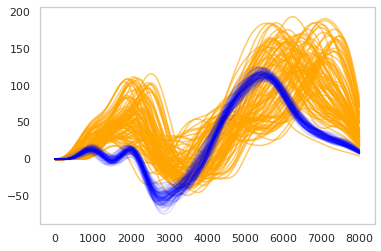

In [47]:
for i in range(100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
for i in range(100):
    plt.plot(s_x[i], color='blue', alpha=0.1)

In [48]:
s_x_torch = torch.stack(([s_x[i] for i in range(len(s_x))]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(len(s_x_prior))]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



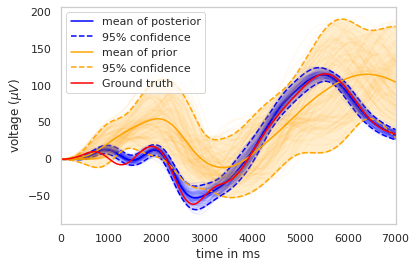

In [49]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()

## Correlation matrices

In [24]:
corr_matrix_marginal = np.corrcoef(posterior_samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

NameError: name 'posterior_samples' is not defined

In [ ]:
condition = posterior.sample((1,))

_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*3),
    figsize=(5,5)
)

## Evaluation of features

In [28]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [68]:
t = obs_real_stat

t

tensor([[ 1.9490e+03,  2.7060e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,
          1.9919e+02,  1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,
          7.0213e+03,  1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04,
         -2.2304e+04,  3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)

In [74]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 1.9490e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,  1.9919e+02,
          1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,  7.0213e+03,
          1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04, -2.2304e+04,
          3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00]],
       dtype=torch.float64)


torch.Size([1, 19])

In [54]:
posterior.set_default_x(obs_real_stat)

DirectPosterior(
               method_family=snpe,
               net=<a Flow, see `.net` for details>,
               prior=BoxUniform(Uniform(low: torch.Size([17]), high: torch.Size([17])), 1),
               x_shape=torch.Size([1, 20]))
               

In [55]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [79]:

for i in range(20):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

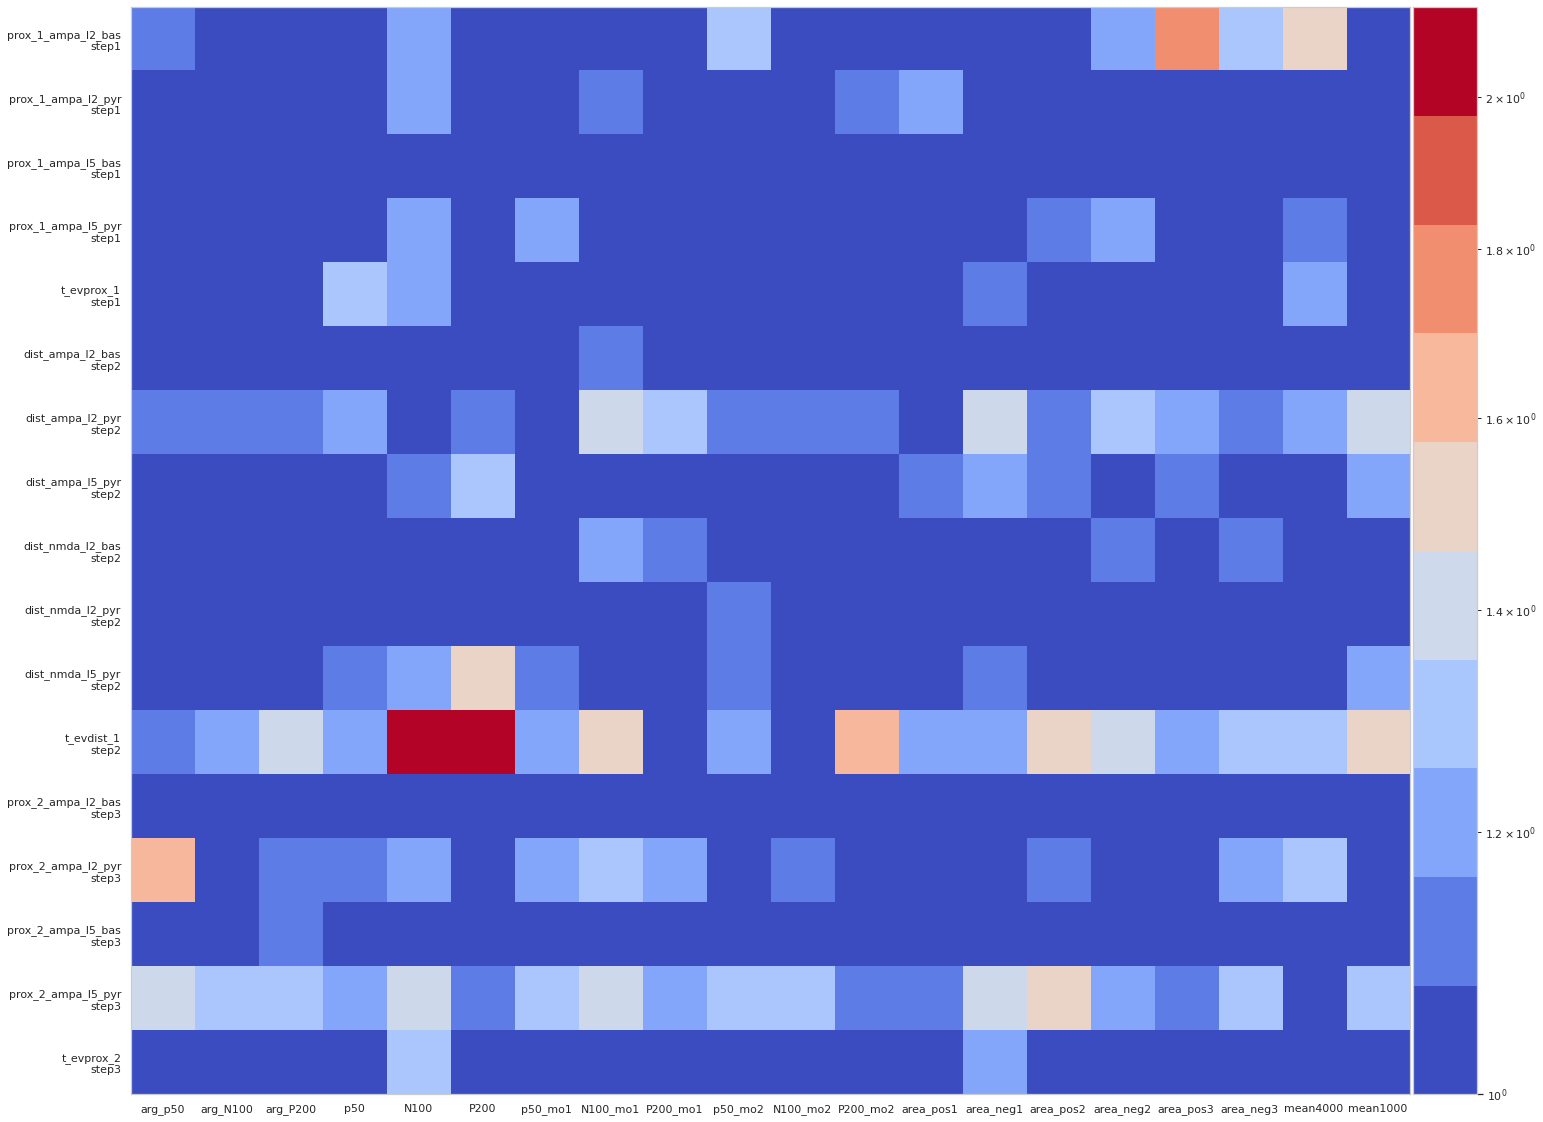

In [106]:
sum_stats_names =                 [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_mo1',
                    'N100_mo1',
                    'P200_mo1',
                    'p50_mo2',
                    'N100_mo2',
                    'P200_mo2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

sample_list = []
for i in range(20):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

In [120]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(20):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 35 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 28 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 36 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([0, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 30 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 34 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 29 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 33 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 31 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 32 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])
Neural network successfully converged after 37 epochs.


Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([10000, 19])
t shape torch.Size([1, 20])
torch.Size([1, 20])


KeyboardInterrupt: 

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

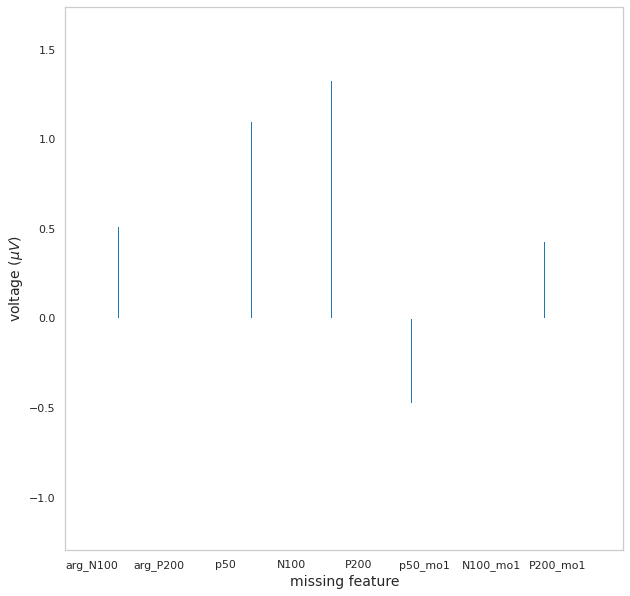

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


In [121]:
s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior)
s_x_stat = calculate_summary_stats_temporal(s_x)
                                                

In [134]:
t[0]

tensor([ 1.9490e+03,  2.7060e+03,  5.9300e+03,  2.1558e+01, -4.0164e+01,
         1.9919e+02,  1.5108e+01,  6.7586e+01,  1.9520e+02,  3.2594e+01,
         7.0213e+03,  1.2655e+01,  2.1028e+04, -1.1747e+04,  1.6931e+04,
        -2.2304e+04,  3.4816e+05,  0.0000e+00,  4.7747e+01,  7.9176e+00],
       dtype=torch.float64)

34.410999999999994
8.821
9.030999999999999
0.3426654206472814
1.1908244735227738
0.7454976427279791
0.2929940479865423
0.4804624729637844
0.7634706273832214
1.0836820944991712
73.10182756863495
0.595378369776133
426.12008548256523
408.09902244746615
340.98481557103173
727.042788425355
1380.5021171318183
0.001
0.5525858938078323
0.16738297339680588


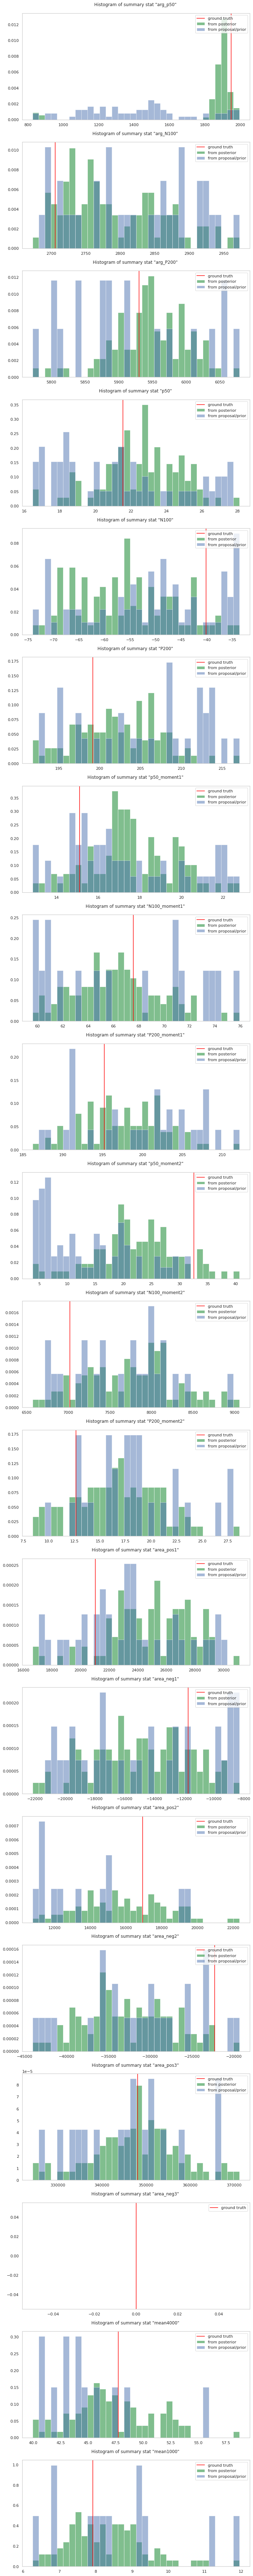

In [137]:
import matplotlib.gridspec as gridspec

sum_stats_names =                  [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'area_pos1',
                    'area_neg1',
                    'area_pos2',
                    'area_neg2',
                    'area_pos3',
                    'area_neg3',
                    'mean4000',
                    'mean1000'
                ]

fig = plt.figure(figsize=(10,5*len(s_x_stat[0])), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(len(sum_stats_names)):

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(len(s_x)):
        globals()['sum_stats%s' % i].append(float(s_x_stat[j][i]))
        globals()['x%s' % i].append(float(s_x_prior_stat[j][i]))

    sum_stat = globals()['sum_stats%s' % i]
    
    
    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max(sum_stat)-min(sum_stat))*0.03 + 0.001
    
    print(binsteps)
   
    binrange = np.arange(min(sum_stat), max(sum_stat) + binsteps, binsteps)
    
   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins = binrange,  facecolor='g', alpha=0.75, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins = binrange,   facecolor='b', alpha=0.5, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(t[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')